## Problem 1: Convolution Responses

In [1]:
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d
%matplotlib inline

Read the image

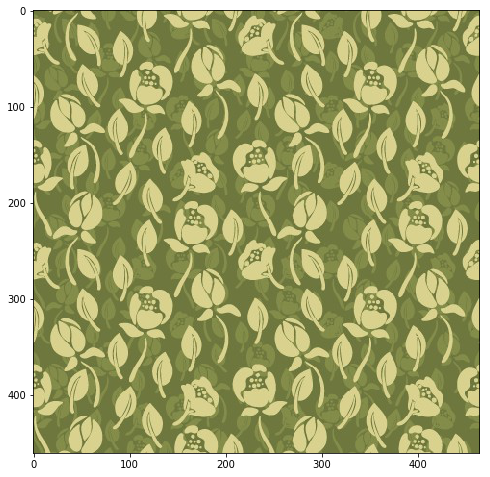

In [2]:
img = imread('Vintage-green-flower-seamless-pattern.jpg')
plt.figure(figsize = (8,10))
plt.imshow(img)
img = resize(img, (256, 256), preserve_range=True)[:,:,0]

## Find the centers of big flower patterns.

### Take the following sample of flower-pattern:

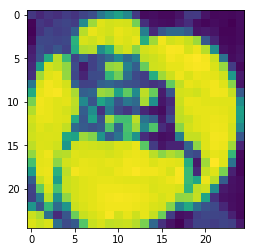

In [3]:
t, l, b, r = 159, 184, 184, 209
kernel = img[t:b, l:r]
plt.imshow(kernel)

In [4]:
def get_pattern(img, kernel): 
    # TODO Implement THIS function
    tilde_A = convolve2d(img, kernel, mode='same')
    overline_A = np.sqrt(convolve2d(np.square(img), np.ones(kernel.shape), mode = 'same'))
    result = tilde_A / overline_A 
    
    return result

In [5]:
result = get_pattern(img/255., kernel/255.)

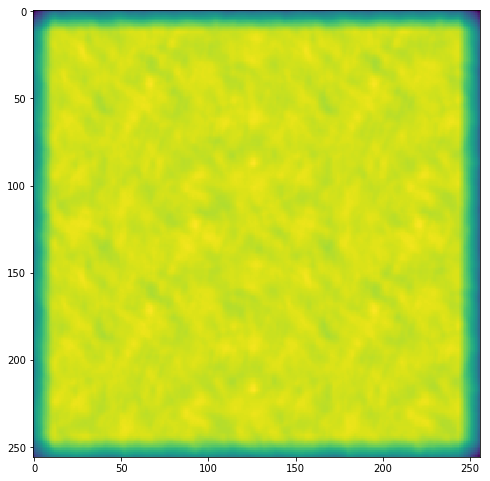

In [6]:
result = result / result.max()
plt.figure(figsize = (8,10))
plt.imshow(result)

### Determine some threshold to get acceptable result.

In [7]:
'define some treshold'
treshold = 0.986 # TODO Determine a THRESHOLD

In [8]:
centers = result.copy()
centers[result>=treshold] = 1
centers[result<treshold] = 0

Visualize the result

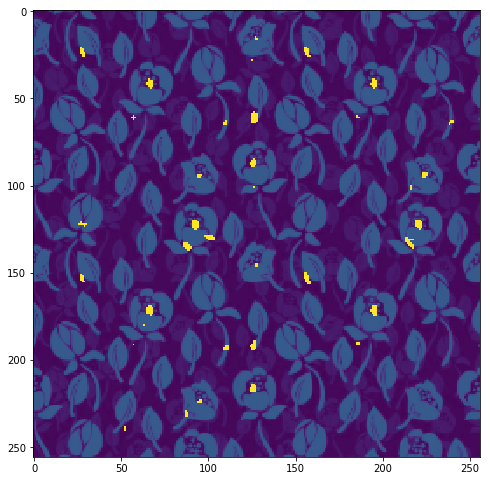

In [9]:
vis = img/255.
vis[centers==1] = 1
vis[centers!=1] *= 0.5
plt.figure(figsize = (8,10))
plt.imshow(vis)

## (Suplementary) Problem 2: Implement the following geometric transformation for images (with any interpolation you like):
$$
T:\mathbb{R}^2\rightarrow \mathbb{R}^2
\qquad T(x,y) = ((y^2+1)e^x - cos^2y, y^3)
$$

In [10]:
from math import (ceil, floor)

In [69]:
def bilinear_interpolate(x, y, img):
    
    if x < 0 or y < 0:
        return 0
    
    x1 = int(floor(x))
    y1 = int(floor(y))
    x2 = x1 + 1
    y2 = y1 + 1
    
    if x2 >= img.shape[0] or y2 >= img.shape[1]:
        return 0
    
    diff_x = x2 - x1
    diff_y = y2 - y1
    
    interpolate_x_y1 = -((x - x2) / (diff_x)) * img[x1, y1] + ((x - x1) / (diff_x)) * img[x2, y1]
    interpolate_x_y2 = -((x - x2) / (diff_x)) * img[x1, y2] + ((x - x1) / (diff_x)) * img[x2, y2]
    imterpolate_y = -((y - y2) / (diff_y)) * interpolate_x_y1 + ((y - y1) / (diff_y)) * interpolate_x_y2
    
    return imterpolate_y

In [38]:
x = 5
int(ceil(x)), int(floor(x))

(5, 5)

In [39]:
x = -0.1
int(ceil(x)), int(floor(x))

(0, -1)

In [40]:
x = -0.1
int(floor(x)), int(floor(x)) + 1

(-1, 0)

In [70]:
def transformation(img):
    
    H, W = img.shape   
    A_p = np.zeros_like(img)
    
    for i in range(H):
        for j in range(W):
            uniform_x, uniform_y = (2 * i + 1) / (2 * H), (2 * j + 1) / (2 * W)
            x = np.log(uniform_x + np.cos(uniform_y ** (1/3.)) ** 2) / (uniform_y ** (2/3.) + 1) 
            y = uniform_y ** (1/3.)
            
            A_p[i, j] = bilinear_interpolate(x * H, y * W, img)
                
    
    return A_p

In [68]:
a = (1/28) ** (1/3)
type(a)

float

In [67]:
a = (1/28) ** (1/3.)
type(a)

float

In [57]:
(0.1) ** (1/3.)

0.4641588833612779

In [58]:
(0.1) ** (1/3)

0.4641588833612779

In [59]:
type(3)

int

In [60]:
type(3.)

float

In [66]:
0.2 / (1/3.)

0.6000000000000001

In [65]:
0.2 / (1/3)

0.6000000000000001

In [71]:
res = transformation(img)

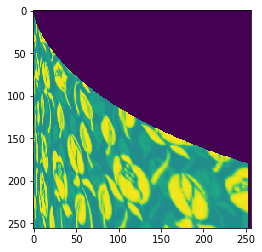

In [72]:
plt.imshow(res)

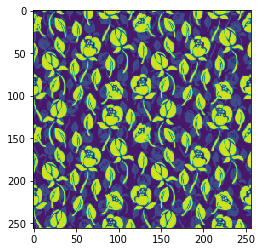

In [73]:
plt.imshow(img)